In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Question 1

"""
 3 step procedure used for all parts:
  1. Initialising Dataset/Data
  2. Defining Plot function
  3. Sending values
"""

'\n 3 step procedure used for all parts:\n  1. Initialising Dataset/Data\n  2. Defining Plot function\n  3. Sending values\n'

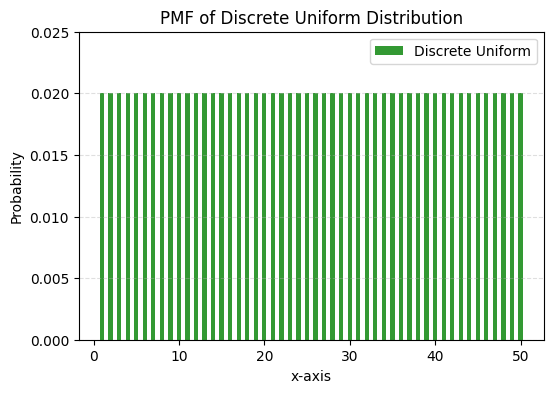

In [ ]:
# (a) Discrete Uniform

def plotting(x,y):
  plt.figure(figsize=(6, 4))
  plt.bar(x,y, width=0.5, alpha=0.8, label='Discrete Uniform', color='green')
  plt.xlabel('x-axis')
  plt.ylabel('Probability')
  plt.title('PMF of Discrete Uniform Distribution')
  plt.grid(axis='y', linestyle='--',alpha=0.4)
  plt.legend()
  plt.ylim(0, 1/n+(1/4)*1/n) #logically chosen range so that the graph looks fitting in the space
  plt.show()


def discrete_uniform(n):
  x=[]
  y=[1/n]*(n) #fixed output for every x
  for k in range(1,n+1,1):
    x.append(k)
  plotting(x,y)


n=50
discrete_uniform(n)




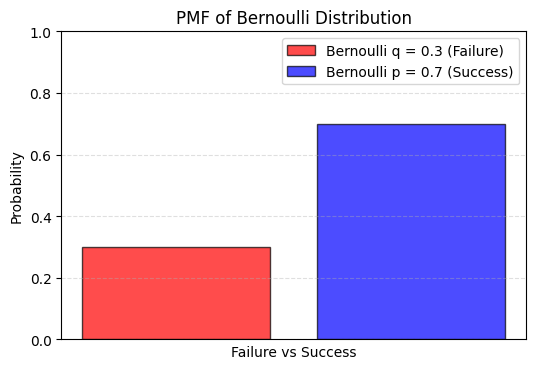

In [ ]:
# (b) Bernoulli's Distribuion

pro_of_success = [0.7]

def plotting(p,q):
    plt.figure(figsize=(6, 4))
    plt.bar(0, height=q, align='center', alpha=0.7, label=f'Bernoulli q = {q} (Failure)', color="red", edgecolor="black")
    plt.bar(1, height=p, align='center', alpha=0.7, label=f'Bernoulli p = {p} (Success)', color="blue", edgecolor="black")
    plt.xlabel('Failure vs Success')
    plt.ylabel('Probability')
    plt.title('PMF of Bernoulli Distribution')
    plt.grid(axis='y', linestyle='--',alpha=0.4)
    plt.ylim(0, 1)
    plt.xticks([])
    plt.legend()
    plt.show()

def bernoulli(n):
    p=n
    q=1-n
    plotting(round(p,2),round(q,2))

for prob in pro_of_success:
  bernoulli(prob)




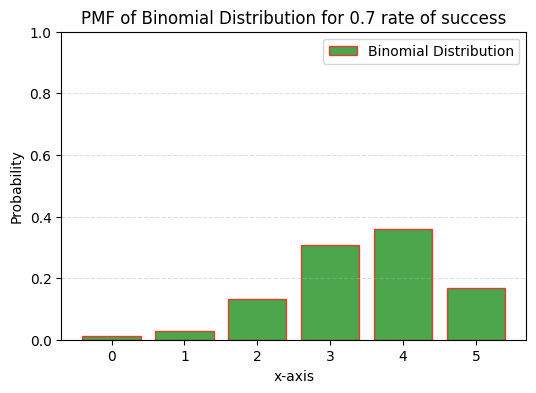

In [ ]:
# (c) Binomial Distribuion

bino_var = [[5, 0.7]] #nested lists with n, p in them

def plotting(y, q):
    x_values = np.arange(len(y)) # linearly incremeneting x axis values
    plt.figure(figsize=(6, 4))
    plt.bar(x_values, height=y, align='center', alpha=0.7, label='Binomial Distribution', color="green", edgecolor="red")
    plt.xlabel('x-axis')
    plt.ylabel('Probability')
    plt.title(f'PMF of Binomial Distribution for {1-q} rate of success')
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.legend()
    plt.ylim(0, 1) #completing graph, probability is always between 0 and 1.
    plt.show()

def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

def nCr(n, k):
    if k==0:
      return n
    else:
      return int(factorial(n) // (factorial(k) * factorial(n - k)))

def binomial(l):
    n = l[0]
    p = l[1]
    q = 1 - p
    y = []

    for k in range(n + 1):
        ncr = nCr(n, k)
        term = float(ncr) * (p**k) * (q**(n - k))  # Ensure term is treated as float
        y.append(term)

    plotting(y, q)

for bino in bino_var:
  binomial(bino)



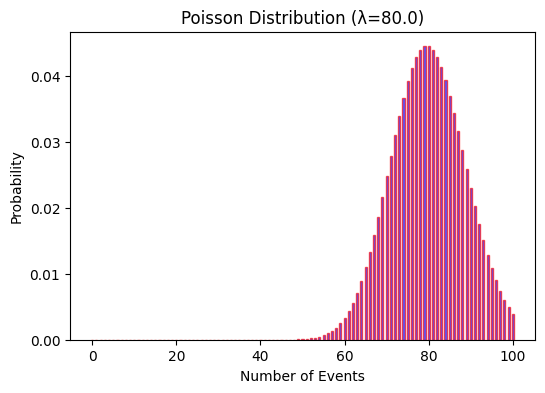

In [ ]:
# (d) Poisson Distribution

M = 100 # number of events
probability = 0.8 # assume
lambda_ = M *probability

def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

def poisson_pmf(k, l):
    return (np.exp(-l) * l**k) / factorial(k)

def poisson_distribution(l,M):
    k_values = np.arange(0, M+1) #a fixed k, in this case 20
    pmf_values = [poisson_pmf(k, l) for k in k_values]
    plotting(pmf_values, k_values, l)

def plotting(p, k_values, l):
    plt.figure(figsize=(6, 4))
    plt.bar(k_values,width = 0.5, height=p, align='center', alpha=0.65, color='blue', edgecolor='red')
    plt.xlabel('Number of Events')
    plt.ylabel('Probability')
    plt.title(f'Poisson Distribution (λ={l})')
    plt.show()

poisson_distribution(lambda_,M)




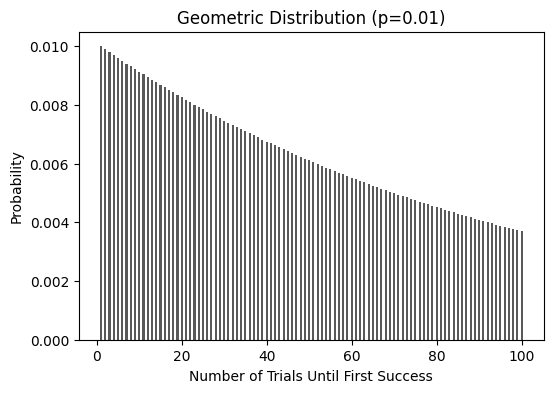

In [ ]:
# (e) Geometric Distribution

# Basically, Geometric distribution is the number of trials needed to get the first success in repeated Bernoullis
values = [0.01]
def geometric_pmf(k, p):
    return ((1 - p) ** (k - 1)) * p

def plotting(p, k_values, prob_of_success):
    plt.figure(figsize=(6, 4))
    plt.bar(k_values, height=p,width=0.5, align='center', alpha=0.65, color='black')
    plt.xlabel('Number of Trials Until First Success')
    plt.ylabel('Probability')
    plt.title(f'Geometric Distribution (p={prob_of_success})')
    plt.show()


def geometric(v):
  k_values_geometric = np.arange(1, 101)  # geometric distribution starts from 1 not 0. 1 to 101 picked arbitarily.
  pmf_values_geometric = [geometric_pmf(k, v) for k in k_values_geometric]
  plotting(pmf_values_geometric, k_values_geometric, v)


for v in values:
    geometric(v)



In [ ]:
#Question 2

"""
Graphically proving that Binomial and Poisson for large values of M and small values of p is equal
"""

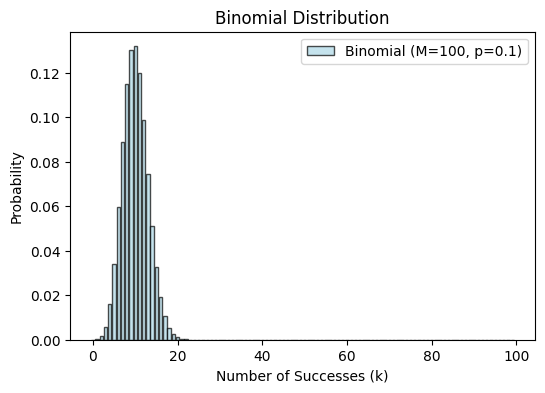

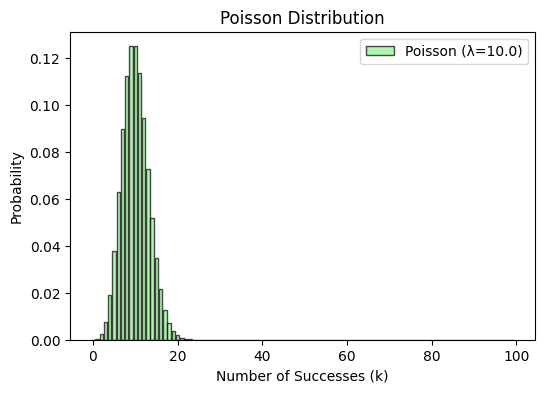

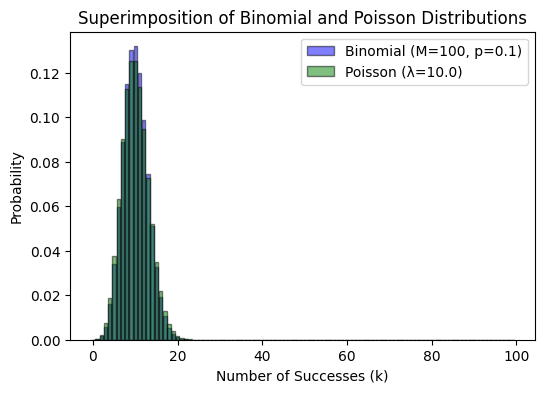

In [ ]:
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

def binomial_pmf(k, M, p):
    """PMF of Binomial distribution."""
    nCr = lambda n, r: factorial(n) // (factorial(r) * factorial(n - r)) # using inline function in python
    return nCr(M, k) * (p**k) * ((1 - p)**(M - k))

def poisson_pmf(k, lambda_):
    """PMF of Poisson distribution."""
    e = 2.71828
    result = e**(-1*lambda_) * lambda_**k / factorial(k)
    return result

M = 100  # Large number of trials
p = 0.1  # Small probability of success

def solve_question(M, p):
    k_values = np.arange(0, M)

    binomial_pmf_values = [binomial_pmf(k, M, p) for k in k_values]

    poisson_lambda = M * p
    poisson_pmf_values = [poisson_pmf(k, poisson_lambda) for k in k_values]

    return k_values, binomial_pmf_values, poisson_pmf_values, poisson_lambda

def plotting1(k_values, binomial_pmf_values,poisson_lambda):
    plt.figure(figsize=(6, 4))
    plt.bar(k_values, height=binomial_pmf_values, align='center', alpha=0.7, label=f'Binomial (M={M}, p={p})', color='lightblue', edgecolor='black')
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Probability')
    plt.title('Binomial Distribution')
    plt.legend()
    plt.show()

def plotting2(k_values, poisson_pmf_values, poisson_lambda):
    plt.figure(figsize=(6, 4))
    plt.bar(k_values, height=poisson_pmf_values, align='center', alpha=0.7, label=f'Poisson (λ={poisson_lambda})', color='lightgreen', edgecolor='black')
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Probability')
    plt.title('Poisson Distribution')
    plt.legend()
    plt.show()

def plotting3(k_values, binomial_pmf_values, poisson_pmf_values, poisson_lambda):
    plt.figure(figsize=(6, 4))
    plt.bar(k_values, height=binomial_pmf_values, align='center', alpha=0.5, label=f'Binomial (M={M}, p={p})', color='blue', edgecolor='black')
    plt.bar(k_values, height=poisson_pmf_values, align='center', alpha=0.5, label=f'Poisson (λ={poisson_lambda})', color='green', edgecolor='black')
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Probability')
    plt.title('Superimposition of Binomial and Poisson Distributions')
    plt.legend()
    plt.show()

k_values, binomial_pmf_values, poisson_pmf_values, lambda_ = solve_question(M, p)

plotting1(k_values, binomial_pmf_values, lambda_)
plotting2(k_values, poisson_pmf_values, lambda_)
plotting3(k_values, binomial_pmf_values, poisson_pmf_values, lambda_)
